**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Celeste Walstrom-Vangor
- Rui Wang
- Jheel Gandhi
- Howard Ma
- Kenny Qiu

# **Research Question**

Can we predict the Letterboxd ratings for upcoming movies based solely on actors in those movies and the ratings of their previous films, focusing on the ratings of Gen Z?

## Background and Prior Work

By figuring out if there is a correlation between actors' previous movies and their forcasted Letterboxd movie rating, we will be able to determine whether a new movie can be determined as highly rated based only on the actors who are starring in it. Although there are many factors that go into the ratings of a movie, if we can create an accurate algorithm that focuses on actors alone it will be highly convinient so people can determine whether a movie will be highly rated before going to see it. As busy college students, we want to dedicate our time to helping people avoid going to a low rated movies before the ratings come out. If we can find a correlation between the ratings of previous movies with actors and the ratings of new movies with those same actors it could save people a lot of time.

Here are some prior work we found online:

1. Vox Analysis on the the actors and actresses who most consistently appear in terrible movies

  One previous analysis from Vox was done on the actors who starred in the best and worst rated films based on metacritic. From which they restricted the data set to only include actors that meet the following criteria:
    1. The actor/actress must have performed in at least 10 films (writing, directing, and producing credits were omitted).
    2. At least one of these films had to have grossed $30 million or more at the box office, adjusted for inflation.
    3. At least one of these films had to be within the past five years (we only wanted semi-active performers).

  From the blog post analysis of the top 10 worst rated actors, we can see familiar names like Adam Sandler and Jennifer Love Hewitt who are often known for being in worse rated movies. On the other hand, for the top 10 best rated actors, familiar names that are known for having good movies like Leonardo Di Caprio and Jennifer Lawerence make the list.

  Something interesting to note is that genres like action and comedy are rated more harshly than genres like documentaries and drama. This is hypothesized to be due to the subjective nature of comedy films.

  This analysis does only look at single actors rather than taking into account all the actors in a film, but it does conclude that there’s at least some correlation between an actor and their movie’s rating.

2.
The Hustle - The actors who are the best (and worst) at their job:

  The Hustle did a similar analysis on actors and the critical ratings they get.
  Here are the datasets used by the blog post:
    1. Average Metacritic scores (a measurement of critical ratings) across all films for 35k+ actors
    2. Average domestic box office data across all films an actor has played a prominent role in over their career

  They chose domestic box office because international films are biased towards franchise films, and the box office dataset is not adjusted for inflation so it favors newer films.

  Similar to the first analysis, critics are biased against comedy and love films, with those films getting lower than average ratings.

  They also included a beloved actors matrix where they plotted the average box office of an actor (how loved they are by the audience) with the average metacritic score (how loved they are by the critics).

  They then did a composite score taking into account both the percentiles of the box office and their metacritic. In this final list, actors like Leonardo DiCaprio and Tom Hanks make the list of the best combination and actors like Bella Thorne and Chad Michael Murray make the list of the worst combination.

  This analysis also seems to support the fact that some actors are more likely to have better rated movies, but this study only takes in single actors as well as the first analysis did, so there’s more work to be done on analyzing multiple actors for a single film.

  Something to note here is that just because a movie has bad critic ratings does not mean that the audience doesn’t like it, as supported by big box offices for some of the worst rated actors.



References:
* https://www.vox.com/2016/4/11/11381206/worst-actors-hollywood
* https://thehustle.co/the-actors-who-are-the-best-and-worst-at-their-job/

# **Hypothesis**


We predict that there exists a positive correlation between the Letterboxd ratings of past movies with the top 1000 most relevant actors and the ratings of their upcoming films. This assumption stems from the idea that actors with a history of highly rated performances are likely to continue appearing in well-received films, contributing to positive Letterboxd reviews.

# **Data**

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name:actors
  - Link to the dataset:https://www.kaggle.com/datasets/gsimonx37/letterboxd?select=actors.csv
  - Number of observations:5523327
  - Number of variables:2
- Dataset #2
  - Dataset Name:genres
  - Link to the dataset: https://www.kaggle.com/datasets/gsimonx37/letterboxd?select=genres.csv
  - Number of observations:990770
  - Number of variables:2
- Dataset #3
  - Dataset Name:language
  - Link to the dataset: https://www.kaggle.com/datasets/gsimonx37/letterboxd?select=languages.csv
  - Number of observations:988826
  - Number of variables:3
- Dataset #4
  - Dataset Name:movies
  - Link to the dataset: https://www.kaggle.com/datasets/gsimonx37/letterboxd?select=movies.csv
  - Number of observations:896400
  - Number of variables:7


We are planning to utilize four datasets: **actors.csv**, **genres.csv**, **language.csv**, and **movies.csv**.

**actors.csv**: This dataset comprises two variables: **id** and **name**. The **id** column contains numerous instances of identical numbers each associated with different **name** entries, representing actors. We intend to consolidate identical **id** numbers and compile a corresponding list of actor names. This process will involve groupby() to handle repeated **id** values.

**genres.csv**: Similar to the **actors.csv**, it contains two variables: **id** and **genre**. We will merge identical **id** numbers, creating a comprehensive list of genres associated with each unique identifier. This dataset will help us understand the distribution of movie genres and their relationships with other variables.

**language.csv**: This dataset includes three variables: **id**, **type**, and **language**. Our approach will not only groupby() the same **id** but also filter entries in the **type** column to retain only 'Language' and 'Primary language'.

**movies.csv**: Containing seven variables, we plan to discard **tagline**, **description**, and **minute** from our analysis.  We will focus on **id**, **name**, **date**, and **rating**, which are more aligned with our objectives.

For data cleaning, we will include movies with a **date** later than 1970, with 'English' among their languages, and we will eliminate any datas containing **'NaN'** to maintain data integrity.

The combination of these datasets will involve merging based on the **id** field, ensuring that each movie's data is enriched with corresponding actors, genres, and language information. The final dataset will feature variables such as **id**, **movie**, **date**, **rating**, **actors**, **genre**, **language**, and **director**. This cohesive dataset will form the foundation of our project's analysis.


In [1]:
# Imports
import pandas as pd

## Dataset Actors

In [2]:
df1 = pd.read_csv('actors.csv')
df1

,id,name
0,1000001,Margot Robbie
1,1000001,Lewis Easter
2,1000001,Onyemachi Ejimofor
3,1000001,Cameron Everitt
4,1000001,Luke Field-Wright
...,...,...
5523322,1896377,Nikita Dzhigurda
5523323,1896382,Marine Petrosyan
5523324,1896387,Rebecca Jim
5523325,1896391,Ko Shibasaki


## Dataset Genres

In [3]:
df5 = pd.read_csv('genres.csv')
df5

,id,genre
0,1000001,Comedy
1,1000001,Fantasy
2,1000001,Adventure
3,1000002,Comedy
4,1000002,Thriller
...,...,...
990765,1896380,Crime
990766,1896380,Drama
990767,1896382,Drama
990768,1896391,Music


## Dataset Language

In [4]:
df7 = pd.read_csv('languages.csv')
df7

,id,type,language
0,1000001,Language,English
1,1000002,Primary language,Korean
2,1000002,Spoken language,English
3,1000002,Spoken language,German
4,1000002,Spoken language,Korean
...,...,...,...
988821,1896389,Language,English
988822,1896390,Language,English
988823,1896391,Language,Japanese
988824,1896392,Language,Chinese


## Dataset Movies

In [5]:
df4 = pd.read_csv('movies.csv')
df4

,id,name,date,tagline,description,minute,rating
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.91
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.57
2,1000003,Everything Everywhere All at Once,2022.0,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.32
3,1000004,Fight Club,1999.0,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27
4,1000005,Interstellar,2014.0,Mankind was born on Earth. It was never meant ...,The adventures of a group of explorers who mak...,169.0,4.32
...,...,...,...,...,...,...,...
896395,1896389,伝七捕物帖 銀蛇呪文,NaN,NaN,Kofu duty guard Yamauchi Hinata-kami cultivate...,98.0,NaN
896396,1896390,太阳的子民 Sa'icelen,NaN,NaN,"The government's discriminatory policies, wars...",38.0,NaN
896397,1896391,柴咲コウ CONCERT TOUR 2023 ACTOR'S THE BEST,NaN,NaN,KO SHIBASAKI CONCERT TOUR 2023 - ACTOR'S THE BEST,NaN,NaN
896398,1896392,相知相守民歌45演唱会,NaN,NaN,NaN,262.0,NaN


# **EDA part 1: Data cleaning**

Now our raw data consists of multiple datasets and isn't very clean, so we will need to do some wrangling. First let's load in the datasets

In [6]:
# Imports
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import ast
import seaborn as sns
sns.set()
sns.set_context('talk')
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
# Note: the statsmodels import may print out a 'FutureWarning'. Thats fine.

### Group By Actor

In [7]:
# Merge the names of actors with the same id together
df1 = pd.read_csv('actors.csv')
grouped1 = df1.groupby('id')['name'].apply(list).reset_index()
grouped1.rename(columns={'name': 'actors'}, inplace=True)
grouped1.head()


,id,actors
0,1000001,"[Margot Robbie, Lewis Easter, Onyemachi Ejimof..."
1,1000002,"[Rosie Peralta, Anna Elisabeth Rihlmann, Andre..."
2,1000003,"[Randall Archer, Boon Pin Koh, Efka Kvaracieju..."
3,1000004,"[Leonard Termo, Greg Bronson, Michael Arturo, ..."
4,1000005,"[Lena Georgas, Jeff Hephner, Elyes Gabel, Broo..."


### Group By Genre

In [8]:
# Merge the genre with the same id together
df5 = pd.read_csv('genres.csv')
grouped5 = df5.groupby('id')['genre'].apply(list).reset_index()
grouped5.head()


,id,genre
0,1000001,"[Comedy, Fantasy, Adventure]"
1,1000002,"[Comedy, Thriller, Drama]"
2,1000003,"[Science Fiction, Action, Adventure]"
3,1000004,[Drama]
4,1000005,"[Science Fiction, Drama, Adventure]"


### Group By Language

In [9]:
# Merge the type of 'Primary language' and the column of 'language' with the same id together
df7 = pd.read_csv('languages.csv')
filtered_df7 = df7[df7['type'].isin(['Language', 'Primary language'])]
filtered_df7.head()

,id,type,language
0,1000001,Language,English
1,1000002,Primary language,Korean
5,1000003,Primary language,English
9,1000004,Language,English
10,1000005,Language,English


### Group By Movie Title

In [10]:
# Merge the movie with the same id together
df4 = pd.read_csv('movies.csv')
df4.rename(columns={'name': 'movie'}, inplace=True)
merged_df14 = pd.merge(df4, grouped1, on='id', how='left')
merged_df14.head()

,id,movie,date,tagline,description,minute,rating,actors
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.91,"[Margot Robbie, Lewis Easter, Onyemachi Ejimof..."
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.57,"[Rosie Peralta, Anna Elisabeth Rihlmann, Andre..."
2,1000003,Everything Everywhere All at Once,2022.0,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.32,"[Randall Archer, Boon Pin Koh, Efka Kvaracieju..."
3,1000004,Fight Club,1999.0,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,"[Leonard Termo, Greg Bronson, Michael Arturo, ..."
4,1000005,Interstellar,2014.0,Mankind was born on Earth. It was never meant ...,The adventures of a group of explorers who mak...,169.0,4.32,"[Lena Georgas, Jeff Hephner, Elyes Gabel, Broo..."


### Group by Director

In [11]:
# Merge the director with the same id together
df6 = pd.read_csv('crew.csv')
directors_df6 = df6[df6['role'] == 'Director']
directors_df6.rename(columns={'name': 'director'}, inplace=True)
directors_df6.drop(columns='role', inplace=True)
grouped6 = directors_df6.groupby('id')['director'].apply(list).reset_index()
grouped6.head()

,id,director
0,1000001,[Greta Gerwig]
1,1000002,[Bong Joon-ho]
2,1000003,"[Daniel Kwan, Daniel Scheinert]"
3,1000004,[David Fincher]
4,1000005,[Christopher Nolan]


### Merge the Groupings

In [12]:
# Combine 'id', 'movie', 'date', 'rating', 'actor', 'genre', 'language', and 'director' into one dataset
merged_df145 = pd.merge(merged_df14, grouped5, on='id', how='left')
merged_df1457 = pd.merge(merged_df145, filtered_df7, on='id', how='left')
merged_df14576 = pd.merge(merged_df1457, grouped6, on='id', how='left')
merged_df14576.head()

,id,movie,date,tagline,description,minute,rating,actors,genre,type,language,director
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.91,"[Margot Robbie, Lewis Easter, Onyemachi Ejimof...","[Comedy, Fantasy, Adventure]",Language,English,[Greta Gerwig]
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.57,"[Rosie Peralta, Anna Elisabeth Rihlmann, Andre...","[Comedy, Thriller, Drama]",Primary language,Korean,[Bong Joon-ho]
2,1000003,Everything Everywhere All at Once,2022.0,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.32,"[Randall Archer, Boon Pin Koh, Efka Kvaracieju...","[Science Fiction, Action, Adventure]",Primary language,English,"[Daniel Kwan, Daniel Scheinert]"
3,1000004,Fight Club,1999.0,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,"[Leonard Termo, Greg Bronson, Michael Arturo, ...",[Drama],Language,English,[David Fincher]
4,1000005,Interstellar,2014.0,Mankind was born on Earth. It was never meant ...,The adventures of a group of explorers who mak...,169.0,4.32,"[Lena Georgas, Jeff Hephner, Elyes Gabel, Broo...","[Science Fiction, Drama, Adventure]",Language,English,[Christopher Nolan]


### Dropping 'tagline', 'description', 'minute', 'type' Variables

In [13]:
# Delete the columns of 'tagline', 'description', 'minute', and 'type'
merged_df14576.drop(columns=['tagline', 'description', 'minute', 'type'], inplace=True)
merged_df14576.head()

,id,movie,date,rating,actors,genre,language,director
0,1000001,Barbie,2023.0,3.91,"[Margot Robbie, Lewis Easter, Onyemachi Ejimof...","[Comedy, Fantasy, Adventure]",English,[Greta Gerwig]
1,1000002,Parasite,2019.0,4.57,"[Rosie Peralta, Anna Elisabeth Rihlmann, Andre...","[Comedy, Thriller, Drama]",Korean,[Bong Joon-ho]
2,1000003,Everything Everywhere All at Once,2022.0,4.32,"[Randall Archer, Boon Pin Koh, Efka Kvaracieju...","[Science Fiction, Action, Adventure]",English,"[Daniel Kwan, Daniel Scheinert]"
3,1000004,Fight Club,1999.0,4.27,"[Leonard Termo, Greg Bronson, Michael Arturo, ...",[Drama],English,[David Fincher]
4,1000005,Interstellar,2014.0,4.32,"[Lena Georgas, Jeff Hephner, Elyes Gabel, Broo...","[Science Fiction, Drama, Adventure]",English,[Christopher Nolan]


### Eliminate Movies that are Outdated

In [14]:
#We want to eliminate movies that are too old, and we decided that 1970 is a good year to draw the line
merged_df14576['date'] = pd.to_numeric(merged_df14576['date'], errors='coerce')
filtered_df = merged_df14576[merged_df14576['date'] > 1970.0]
filtered_df

,id,movie,date,rating,actors,genre,language,director
0,1000001,Barbie,2023.0,3.91,"[Margot Robbie, Lewis Easter, Onyemachi Ejimof...","[Comedy, Fantasy, Adventure]",English,[Greta Gerwig]
1,1000002,Parasite,2019.0,4.57,"[Rosie Peralta, Anna Elisabeth Rihlmann, Andre...","[Comedy, Thriller, Drama]",Korean,[Bong Joon-ho]
2,1000003,Everything Everywhere All at Once,2022.0,4.32,"[Randall Archer, Boon Pin Koh, Efka Kvaracieju...","[Science Fiction, Action, Adventure]",English,"[Daniel Kwan, Daniel Scheinert]"
3,1000004,Fight Club,1999.0,4.27,"[Leonard Termo, Greg Bronson, Michael Arturo, ...",[Drama],English,[David Fincher]
4,1000005,Interstellar,2014.0,4.32,"[Lena Georgas, Jeff Hephner, Elyes Gabel, Broo...","[Science Fiction, Drama, Adventure]",English,[Christopher Nolan]
...,...,...,...,...,...,...,...,...
895437,1895407,Loving You is My Destiny,1971.0,NaN,"[Levent Dönmez, Sacide Keskin, Timuçin Caymaz,...","[Drama, Romance]",Turkish,[Orhan Aksoy]
895438,1895408,Our Round Earth: What It's Like,1971.0,NaN,NaN,[Documentary],English,NaN
895439,1895409,Salgari Of Our Childhood,1971.0,NaN,[Omar Salgari],NaN,Italian,[Corrado Farina]
895440,1895410,Small Smoke at Blaze Creek,1971.0,NaN,NaN,[Documentary],English,[Michael J.F. Scott]


### Drop Rows with Null Data

In [15]:
# Eliminate any datas containing 'NaN'
df_cleaned = filtered_df.dropna()
df_cleaned

,id,movie,date,rating,actors,genre,language,director
0,1000001,Barbie,2023.0,3.91,"[Margot Robbie, Lewis Easter, Onyemachi Ejimof...","[Comedy, Fantasy, Adventure]",English,[Greta Gerwig]
1,1000002,Parasite,2019.0,4.57,"[Rosie Peralta, Anna Elisabeth Rihlmann, Andre...","[Comedy, Thriller, Drama]",Korean,[Bong Joon-ho]
2,1000003,Everything Everywhere All at Once,2022.0,4.32,"[Randall Archer, Boon Pin Koh, Efka Kvaracieju...","[Science Fiction, Action, Adventure]",English,"[Daniel Kwan, Daniel Scheinert]"
3,1000004,Fight Club,1999.0,4.27,"[Leonard Termo, Greg Bronson, Michael Arturo, ...",[Drama],English,[David Fincher]
4,1000005,Interstellar,2014.0,4.32,"[Lena Georgas, Jeff Hephner, Elyes Gabel, Broo...","[Science Fiction, Drama, Adventure]",English,[Christopher Nolan]
...,...,...,...,...,...,...,...,...
153113,1153114,Cinema Chupista Maava,2015.0,3.17,"[Raj Tarun, Avika Gor, Rao Ramesh]","[Comedy, Romance, Family]",Telugu,[Trinadha Rao Nakkina]
153293,1153294,Los Angeles/Tehran,2018.0,2.24,"[Parviz Parastouei, Mahnaz Afshar, Gohar Kheyr...",[Comedy],Persian (Farsi),[Tina Pakravan]
154615,1154616,Kutti Puli,2013.0,2.89,"[G. Gnanasambandam, Raja Simman, Balasaravanan...","[Action, Thriller]",Tamil,[M. Muthaiah]
156022,1156023,To Steal a Thief,1996.0,2.94,"[Eva Dahlman, Agneta Guldberg, Per-Erik Bergqu...","[Comedy, Crime]",Swedish,[Clas Lindberg]


### English Only Movies

In [16]:
# Retain the movies for which English is the primary language
filtered_df = df_cleaned[df_cleaned['language'].apply(lambda x: 'English' in x)]
filtered_df.to_csv('filtered_2.csv', index=False)
filtered_df.head()

,id,movie,date,rating,actors,genre,language,director
0,1000001,Barbie,2023.0,3.91,"[Margot Robbie, Lewis Easter, Onyemachi Ejimof...","[Comedy, Fantasy, Adventure]",English,[Greta Gerwig]
2,1000003,Everything Everywhere All at Once,2022.0,4.32,"[Randall Archer, Boon Pin Koh, Efka Kvaracieju...","[Science Fiction, Action, Adventure]",English,"[Daniel Kwan, Daniel Scheinert]"
3,1000004,Fight Club,1999.0,4.27,"[Leonard Termo, Greg Bronson, Michael Arturo, ...",[Drama],English,[David Fincher]
4,1000005,Interstellar,2014.0,4.32,"[Lena Georgas, Jeff Hephner, Elyes Gabel, Broo...","[Science Fiction, Drama, Adventure]",English,[Christopher Nolan]
5,1000006,Joker,2019.0,3.83,"[Danny Schoch, Graham Mabry, Steven Elson, Rog...","[Thriller, Drama, Crime]",English,[Todd Phillips]


### Final Dataset

Now we have merged our loose datasets and dropped the null values, here's what the final dataset look like

In [17]:
df = pd.read_csv('filtered_2.csv')
df

,id,movie,date,rating,actors,genre,language,director
0,1000001,Barbie,2023.0,3.91,"['Margot Robbie', 'Lewis Easter', 'Onyemachi E...","['Comedy', 'Fantasy', 'Adventure']",English,['Greta Gerwig']
1,1000003,Everything Everywhere All at Once,2022.0,4.32,"['Randall Archer', 'Boon Pin Koh', 'Efka Kvara...","['Science Fiction', 'Action', 'Adventure']",English,"['Daniel Kwan', 'Daniel Scheinert']"
2,1000004,Fight Club,1999.0,4.27,"['Leonard Termo', 'Greg Bronson', 'Michael Art...",['Drama'],English,['David Fincher']
3,1000005,Interstellar,2014.0,4.32,"['Lena Georgas', 'Jeff Hephner', 'Elyes Gabel'...","['Science Fiction', 'Drama', 'Adventure']",English,['Christopher Nolan']
4,1000006,Joker,2019.0,3.83,"['Danny Schoch', 'Graham Mabry', 'Steven Elson...","['Thriller', 'Drama', 'Crime']",English,['Todd Phillips']
...,...,...,...,...,...,...,...,...
36359,1126883,Bangaram,2006.0,2.97,"['Ashutosh Rana', 'Trisha Krishnan', 'L. B. Sr...","['Drama', 'Action']",English,['Dharani']
36360,1127955,Emu War - OverSimplified,2018.0,3.53,['Stuart Webster'],"['Documentary', 'History']",English,['Stuart Webster']
36361,1127969,Lee Evans: Wired and Wonderful,2002.0,3.56,['Lee Evans'],['Comedy'],English,['Tom Poole']
36362,1128916,The Return of 'Allo 'Allo!,2007.0,3.62,"['Gorden Kaye', 'Vicki Michelle', 'Arthur Bost...",['Documentary'],English,['Dennis Martin']


In [18]:
# Remove columns so we only have movie name, rating, name of actors
columns_to_keep = ['movie', 'rating', 'actors']

# Drop columns that are not in the 'columns_to_keep' list
df = df[columns_to_keep]

# Display the first few rows of the modified DataFrame
df.head()
print(len(df))

36364


There's duplicate entries looking at row 2 and 3 of the previous table, let's dedupe

In [19]:
df = df.drop_duplicates(subset='movie', keep='first')

# Display the first few rows of the DataFrame after removing duplicates
df.head()

,movie,rating,actors
0,Barbie,3.91,"['Margot Robbie', 'Lewis Easter', 'Onyemachi E..."
1,Everything Everywhere All at Once,4.32,"['Randall Archer', 'Boon Pin Koh', 'Efka Kvara..."
2,Fight Club,4.27,"['Leonard Termo', 'Greg Bronson', 'Michael Art..."
3,Interstellar,4.32,"['Lena Georgas', 'Jeff Hephner', 'Elyes Gabel'..."
4,Joker,3.83,"['Danny Schoch', 'Graham Mabry', 'Steven Elson..."


That looks better and can be used for analysis!

# **EDA part 2: Data Exploring and visualization**

Now let's create a new table with two columns, actor name and the average rating of all the movies they were in

First let's have a dictionary actor_ratings which stores rating info for each actor

In [20]:
from ast import literal_eval
# Create an empty dictionary to store the sum and count of ratings for each actor
actor_ratings = {}

# Iterate through each row of the DataFrame
for index, row in df.iterrows():
  # Extract the list of actors from the 'actors' column
  actors_list_str = row['actors']
  actors_list_arr = literal_eval(actors_list_str)
  row['actors'] = actors_list_arr
  # Extract the rating for the movie
  rating = row['rating']

  # Check if the 'actors' column is a list
  if isinstance(actors_list_arr, list):
      # Iterate through each actor in the list
    for actor in actors_list_arr:
      # If the actor is not in the dictionary, add a new entry
      if actor not in actor_ratings:
          actor_ratings[actor] = {'sum': rating, 'count': 1}
      else:
          # If the actor is already in the dictionary, update the sum and count
          actor_ratings[actor]['sum'] += rating
          actor_ratings[actor]['count'] += 1

Then let's convert it into a table

In [21]:
# Create a list of dictionaries for actor names and their average ratings
data_list = [{'actor_name': actor, 'average_rating': round(data['sum'] / data['count'], 2), 'movie_count': data['count']} for actor, data in actor_ratings.items()]

# Create a new DataFrame using pandas.concat
average_ratings_df = pd.concat([pd.DataFrame(data_list)])

# Drop duplicate rows
average_ratings_df = average_ratings_df.drop_duplicates()

# Filter actors with more than 10 movies
average_ratings_df_filtered = average_ratings_df[average_ratings_df['movie_count'] > 20]

# Display the new table with actor names and their average ratings
average_ratings_df_filtered.head()

,actor_name,average_rating,movie_count
0,Margot Robbie,3.15,28
88,John Cena,2.75,40
100,Rob Brydon,3.31,37
108,Ryan Gosling,3.47,34
109,America Ferrera,3.37,25


Top 10 actors/actresses are below

In [22]:
# Sort the DataFrame by 'average_rating' in descending order and get the top 10
top_10_high_ratings = average_ratings_df_filtered.sort_values(by='average_rating', ascending=False).head(10)

# Display the top 10 actors with the highest ratings
print("Top 10 actors with the highest ratings:")
top_10_high_ratings

Top 10 actors with the highest ratings:


,actor_name,average_rating,movie_count
95359,David Attenborough,3.94,38
82193,Jay-Z,3.75,26
8577,Roger Taylor,3.73,22
47967,Dave Grohl,3.71,34
75971,Jonas Mekas,3.70,24
46069,Martin Luther King Jr.,3.69,44
22724,Spike Lee,3.67,30
10780,Gregg Turkington,3.67,27
13224,Yoko Ono,3.66,32
43054,Bruce Springsteen,3.66,28


Here's Ryan Gosling's number

In [23]:
average_ratings_df_filtered[average_ratings_df_filtered['actor_name'] == 'Ryan Gosling']

,actor_name,average_rating,movie_count
108,Ryan Gosling,3.47,34


Bottom 10 actors

In [24]:
# Sort the DataFrame by 'average_rating' in ascending order and get the bottom 10
top_10_low_ratings = average_ratings_df_filtered.sort_values(by='average_rating', ascending=True).head(10)

# Display the top 10 actors with the highest ratings
print("Top 10 actors with the lowest ratings:")
top_10_low_ratings

Top 10 actors with the lowest ratings:


,actor_name,average_rating,movie_count
30490,Jackie Sandler,2.43,33
42366,Bella Thorne,2.44,28
39223,Natassia Malthe,2.46,28
34105,Sadie Sandler,2.47,21
81277,Steven Seagal,2.48,49
83129,Diana Terranova,2.50,22
56894,Ryan Hansen,2.50,22
34100,Sunny Sandler,2.50,22
60107,Arielle Kebbel,2.51,25
6254,Chris Coppola,2.51,21


Let's see the general trend of movie ratings

Text(0.5, 1.0, 'Ratings vs number of movies')

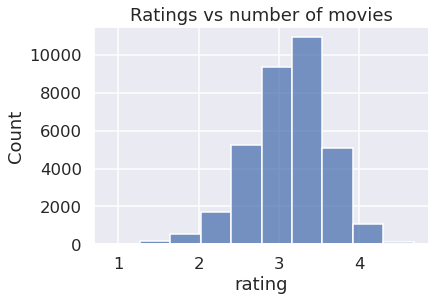

In [25]:
sns.histplot(x= df['rating'], bins = 10)
plt.title('Ratings vs number of movies')

We can see that the movies are pretty normally distributed

now let's look at each actor's average movie rating vs their movie counts

<AxesSubplot:xlabel='average_rating', ylabel='movie_count'>

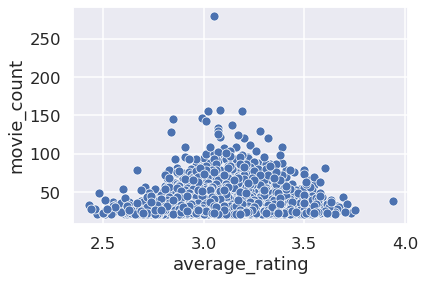

In [26]:
sns.scatterplot(x=average_ratings_df_filtered['average_rating'], y=average_ratings_df_filtered['movie_count'])

### How accurate are our predictions if we compare it with the actual rating a movie received


we want to come up with rating predictions then compare it with the actual rating to see how accurate we are

***We first want to look at the relationships between a movie's rating vs the average ratings of every actor in the movie***

Add column to original df where we get the average rating of all the actors in that row by using our dictionary to get the average rating of each actor

In [27]:
for index, row in average_ratings_df_filtered.iterrows():
    actor_name = row['actor_name']
    if actor_name in actor_ratings:
        actor_ratings[actor_name]['average_rating'] = row['average_rating']

Now let's create a new column for average rating of actors for a movie

In [28]:
import ast

# Function to calculate average rating of a list of actors
def calculate_avg_rating(actors, actor_ratings):
    if isinstance(actors, list) and len(actors) > 0:
        valid_ratings = [actor_ratings[actor]['average_rating'] for actor in actors if actor_ratings[actor]['average_rating'] is not None]
        if valid_ratings:
            return sum(valid_ratings) / len(valid_ratings)
    return None

# Apply the function to create a new 'avg_rating_of_actors' column
df['avg_rating_of_actors'] = df['actors'].apply(lambda actors: calculate_avg_rating(actors, actor_ratings))

# Iterate over the DataFrame to clean and update values
for index, row in df.iterrows():
    # Extract the list of actors from the 'actors' column
    actors_list_str = row['actors']
    actors_list_arr = ast.literal_eval(actors_list_str)  # Using ast.literal_eval to safely evaluate the string as a Python literal
    row['actors'] = actors_list_arr

    # Extract the rating for the movie
    rating = row['rating']
    actor_num = 0
    actor_rating = 0

    # Check if the 'actors' column is a list
    if isinstance(actors_list_arr, list):
        for actor in actors_list_arr:
            if 'average_rating' in actor_ratings[actor]:
                actor_rating += actor_ratings[actor]['average_rating']
                actor_num += 1

        avg_rating = None
        if actor_num > 0:
            avg_rating = round(actor_rating / actor_num, 2)

        # Update the 'avg_rating_of_actors' column
        df.at[index, 'avg_rating_of_actors'] = avg_rating

# Drop rows with missing values in 'avg_rating_of_actors' or 'rating'
df = df.dropna(subset=['avg_rating_of_actors', 'rating'])

# Display the first few rows of the cleaned DataFrame
df.head()

,movie,rating,actors,avg_rating_of_actors
0,Barbie,3.91,"['Margot Robbie', 'Lewis Easter', 'Onyemachi E...",3.14
1,Everything Everywhere All at Once,4.32,"['Randall Archer', 'Boon Pin Koh', 'Efka Kvara...",3.06
2,Fight Club,4.27,"['Leonard Termo', 'Greg Bronson', 'Michael Art...",3.17
3,Interstellar,4.32,"['Lena Georgas', 'Jeff Hephner', 'Elyes Gabel'...",3.23
4,Joker,3.83,"['Danny Schoch', 'Graham Mabry', 'Steven Elson...",3.2


In [29]:
import patsy
import statsmodels.api as sm

# Use patsy to create design matrices
outcome_1, predictors_1 = patsy.dmatrices('rating ~ avg_rating_of_actors', df)

# Create an OLS model
mod_1 = sm.OLS(outcome_1, predictors_1)

# Fit the model
res_1 = mod_1.fit()

# Display the summary statistics
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     89.72
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        07:45:13   Log-Likelihood:                -12772.
No. Observations:               25468   AIC:                         2.580e+04
Df Residuals:                   25340   BIC:                         2.684e+04
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

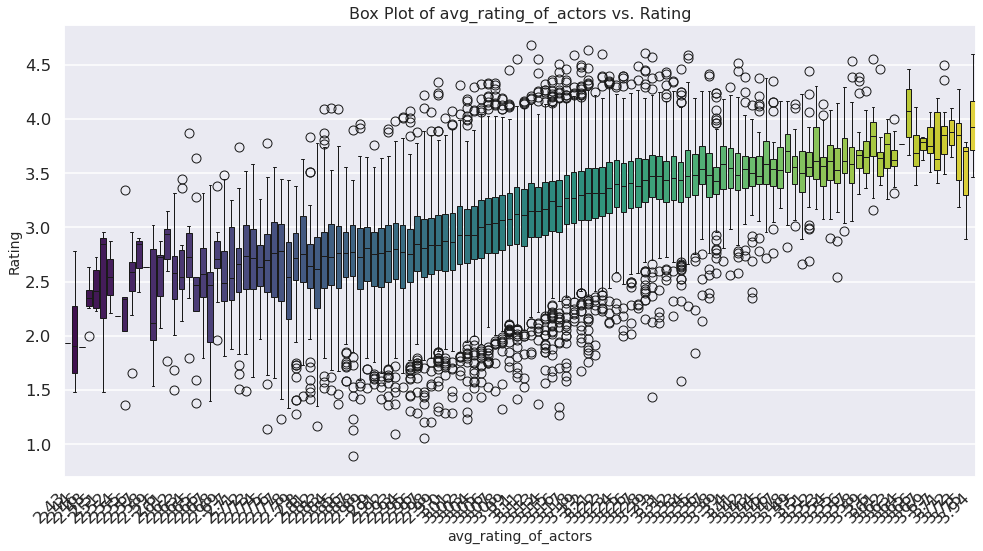

In [30]:
# Set up the figure size for the plot
plt.figure(figsize=(14, 8))

# Create a box plot using Seaborn
sns.boxplot(x='avg_rating_of_actors', y='rating', data=df, palette='viridis')

# Set the title of the plot
plt.title('Box Plot of avg_rating_of_actors vs. Rating', fontsize=16)

# Set the labels for the x and y axes
plt.xlabel('avg_rating_of_actors', fontsize=14)
plt.ylabel('Rating', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Adjust the layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

Let's look at the relationship between average rating of actors in a movie vs the movie's rating

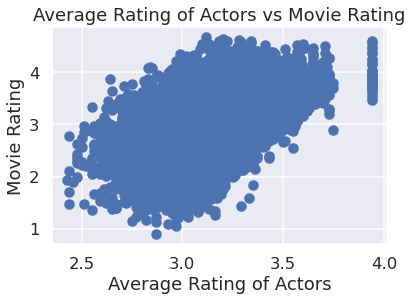

In [31]:
# Create a scatter plot using Matplotlib
plt.scatter(df['avg_rating_of_actors'], df['rating'])

# Set the label for the x-axis
plt.xlabel('Average Rating of Actors')

# Set the label for the y-axis
plt.ylabel('Movie Rating')

# Set the title of the plot
plt.title('Average Rating of Actors vs Movie Rating')

# Display the plot
plt.show()

Seems like there are some signs of correlation happening here but is it strong enough? Let's train some models to see


# **Models exploration**

## ***Linear regression Model***


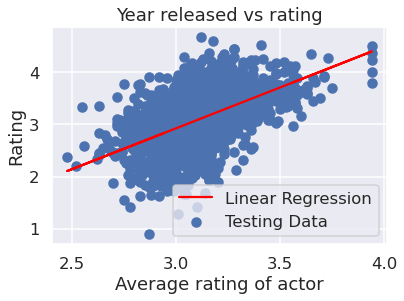

Coefficient(s): [1.56917309]
Intercept: -1.7849436501096538
Mean Squared Error: 0.16553406510901802


In [32]:
# Import necessary modules from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract features (X) and target variable (y) from the DataFrame 'df'
X = df[['avg_rating_of_actors', 'genre', 'director']].values
y = df['rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred = model.predict(X_test)

# Plot data points and regression line
plt.scatter(X_test, y_test, label='Testing Data')    # Plot testing data points
plt.plot(X_test, y_pred, color='red', label='Linear Regression')    # Plot regression line
plt.xlabel('Average rating of actor')
plt.ylabel('Rating')
plt.title('Year released vs rating')
plt.legend()
plt.show()

# Display the coefficient(s) and intercept of the linear regression model
print("Coefficient(s):", model.coef_)
print("Intercept:", model.intercept_)

# Calculate and display the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

**Let's try to make some predictions based on one actor!**

In [33]:
def One_actor_prediction():
    # Prompt user to enter an actor's name
    name = input("Enter an actor of your choice: ")

    # Retrieve the average rating of the specified actor from the DataFrame
    score = average_ratings_df_filtered.loc[average_ratings_df_filtered['actor_name'] == name, 'average_rating'].iloc[0]

    # Create a list containing the actor's score
    score_list = [score]

    # Create a list to hold the data points
    data_points = [[score]]

    # Use the trained model to predict the rating for the specified actor
    predictions = model.predict(data_points)

    # Return the predicted rating
    return predictions

In [ ]:
for i in range(3):
  prediction = One_actor_prediction()
  print("Predicted score of this actor:", prediction)

## ***Neural Network Model***

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
X = df['avg_rating_of_actors'].values.reshape(-1, 1)
X= X.astype(float)
y = df['rating'].values.reshape(-1, 1)
y= y.astype(float)
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) #Split the dataset into training-testing

#Build a neural network model
NNmodel = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
#Compile the model
NNmodel.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Fit the model
NNmodel.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test),verbose = 0)

In [ ]:
#Evaluate the loss
test_loss = NNmodel.evaluate(X_test, y_test)

In [ ]:
def NN_prediction():
  name = input("Enter an actor of your choice: ")
  while ~average_ratings_df_filtered.isin([name]).any().any():
    name = input("Couldn't find the actor, please try again: ")

  score = average_ratings_df_filtered.loc[average_ratings_df_filtered['actor_name'] == name, 'average_rating'].iloc[0]
  score_list = [score]
  data_points = []
  data_points.append(score_list)
  predictions = NNmodel.predict(data_points)
  return predictions


In [ ]:
prediction = NN_prediction()
print("Predicted score of this actor:", prediction)

It looks like our loss for the neural network model(0.1643) is slightly lower than that of the linear regression model(0.1655), which implies slightly better performance. But what other models can we use?

## ***K-Nearest-Neighbor Model***

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Splitting data into training and testing sets
X = df['avg_rating_of_actors'].values.reshape(-1, 1)
X= X.astype(float)
y = df['rating'].values.reshape(-1, 1)
y= y.astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=100)  # You can adjust the number of neighbors

# Fitting the model
knn_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

It looks like the loss for the KNN model is very similar to the linear regression model

## ***Lasso Regression Model***

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Lasso regression model
lasso_reg = Lasso(alpha=0.05)
lasso_reg.fit(X_train_scaled, y_train)
y_pred = lasso_reg.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Right now, it seems like the common regression models all give out similar Mean Squared Error value. Thus, we will mainly use the neural network model and do some hyperparameter tuning to it, as it has the best performance by far.

# **Ethics & Privacy**

As a group of students enrolled at UCSD, we all acknowledge that we have aspects of our lives in common that could create biases in our research, and therefore data. We are all members of Gen Z, students, live/lived in San Diego, privileged enough to receive a high education, etc. These aspects of our lives could create an underlying bias that we need to address. Knowing this, we need to ensure that we are accessing data that reaches beyond our generation and using sources that address movies and actors of all ages and backgrounds, basing their popularity on one designated, impartial scale. Additionally, we chose to use Letterboxd for the rating of the movies in our data sets. We know that half of Letterboxd users are under the age of 35, and more than half are between 16 and 24 (https://variety.com/2023/film/news/letterboxd-martin-scorsese-younger-audience-classic-films-1235804153/). Since we know this to be true, we have decided to make our intentions about being able to predict the movie ratings of only Letterboxd users, meaning mostly Generation Z movie ratings. If this is made clear to the audience, we will avoid a bias, as it is not going to skew the data, but be a clear intention in the research process. We are also aware of the fact that choosing Letterboxd in the first place is likely a result of our generation. This could therefore mean that the scale we are using to rate movies is based more than half on the younger portion of the population. Although this is true, Letterboxd will have an impartial scale and vast amount of data to access. As a warning, we will provide this context to the audience so they are well informed that the ratings may primarily reflect the views of the younger generations, and may not accurately depict how the elder populations feel about the movies.

We have intentionally chosen to work with a dataset that is public
information accessable from Kaggle to avoid issues with privacy. Since this is a public data set, we will not have to worry about terms of use privacy issues.

# **Team Expectations**



*   We decide to meet at least once a week when necessary and previously decided upon
*   We want to ensure that there is a hybrid meeting system available so group members can join from anywhere
*   We want to make sure that deadlines are clearly communicated and that people are gently reminded to meet those deadlines
*   Judgment free zone!











# **Project Timeline Proposal**

In [ ]:
from IPython.display import Image
Image('/content/Screenshot 2024-02-25 at 6.31.49 PM.png')